In [4]:
# Writing to a file
with open("output.txt", "w") as file:
    file.write("This is Day 47 output.\n")
    
# Reading a file
with open("output.txt", "r") as file:
    content = file.read()
    print(content)

This is Day 47 output.



In [4]:
import json

# From Python dict to JSON
data = {"name": "Paresh", "day": 47}
json_str = json.dumps(data)
print(json_str)

# From JSON to Python dict
parsed = json.loads(json_str)
print(parsed["name"])
dump = json.dumps(parsed)

# Saving JSON Dictionary into JSON File 
with open("paresh.json", "w") as file:
    file.write(dump)

{"name": "Paresh", "day": 47}
Paresh


In [9]:
import pandas as pd

df = pd.read_csv("Grammy Award Nominees and Winners 1958-2024.csv")  # load data
print(df.head())              # see top 5 rows
print(df.columns)        # see column names
print(df.info())         # data types, nulls

   Unnamed: 0  Year  Ceremony  Award ID Award Type  \
0           0  1958         1       587       Work   
1           1  1958         1       587       Work   
2           2  1958         1       587       Work   
3           3  1958         1       587       Work   
4           4  1958         1       587       Work   

                    Award Name                                   Work  \
0  Best Recording For Children       Childrens' Marching Song (Album)   
1  Best Recording For Children  Mommy, Give Me A Drinka Water (Album)   
2  Best Recording For Children                       The Witch Doctor   
3  Best Recording For Children                         Tubby The Tuba   
4  Best Recording For Children               Fun In Shariland (Album)   

                           Nominee  Winner  
0                  Cyril Stapleton   False  
1                       Danny Kaye   False  
2  David Seville And The Chipmunks   False  
3                      Jose Ferrer   False  
4         S

KeyError: 'winner'

In [10]:
# Dropping unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
# Checking for missing values
df.isnull().sum()

Year            0
Ceremony        0
Award ID        0
Award Type      0
Award Name      0
Work          893
Nominee         0
Winner          0
dtype: int64

In [12]:
# Filling the missing values
df['Work'] = df['Work'].fillna("Unknown")

<Axes: xlabel='Year'>

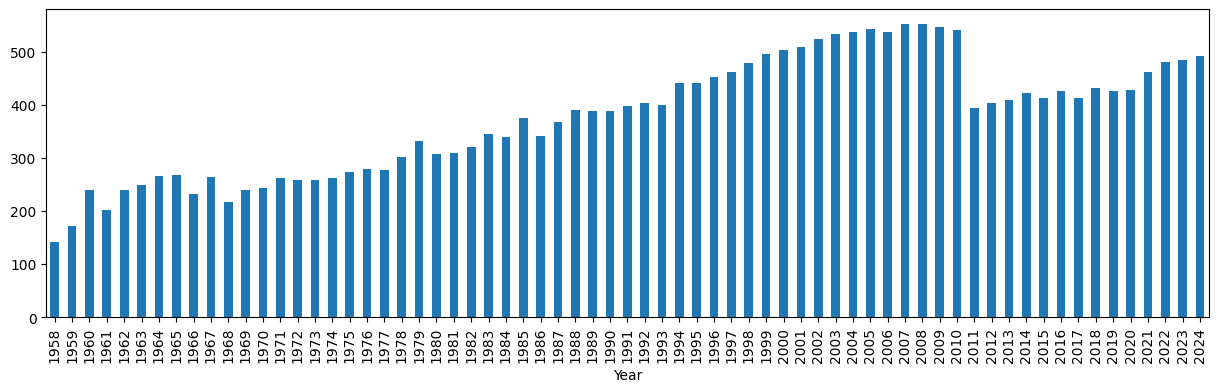

In [13]:
# Value count and distribution
df['Award Type'].value_counts()
df['Award Name'].value_counts().head(10)
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,4))

/tmp/ipykernel_5799/2073502438.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='viridis')


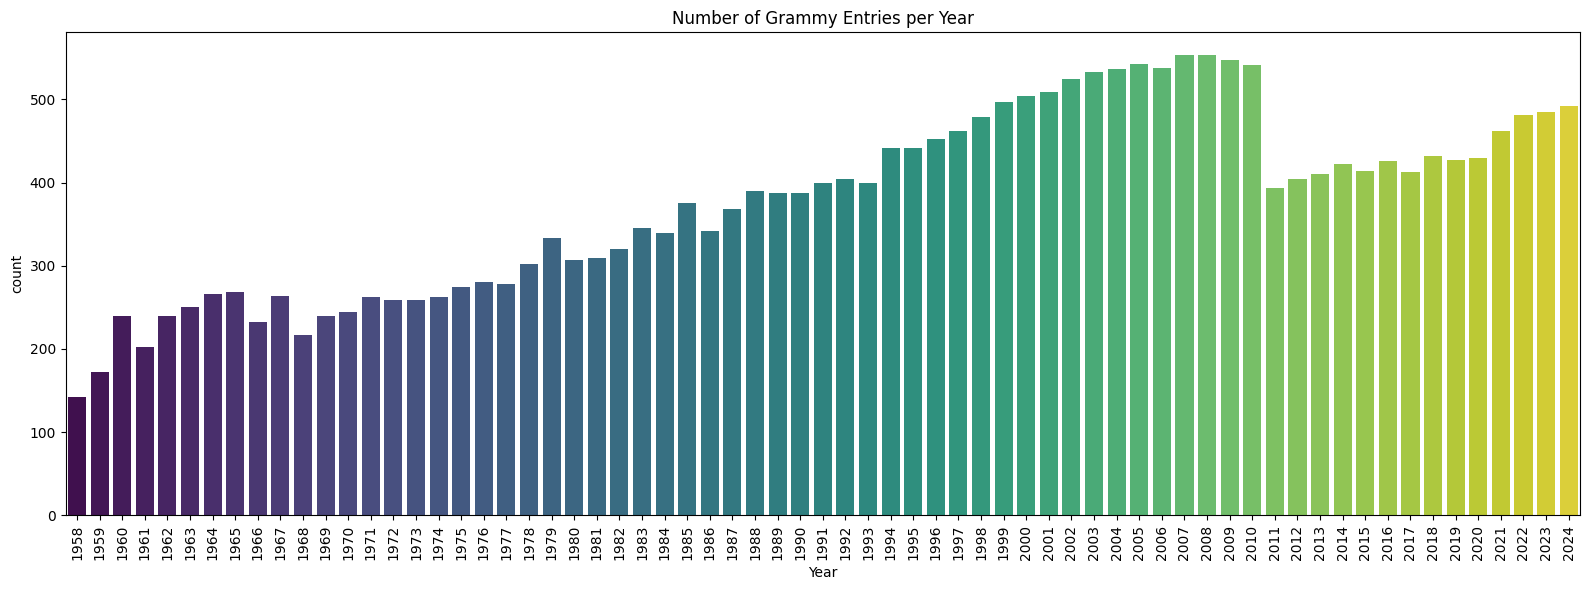

In [14]:
# Plot categorized by year
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Year', palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Grammy Entries per Year")
plt.tight_layout()
plt.show()

<Axes: xlabel='Winner', ylabel='count'>

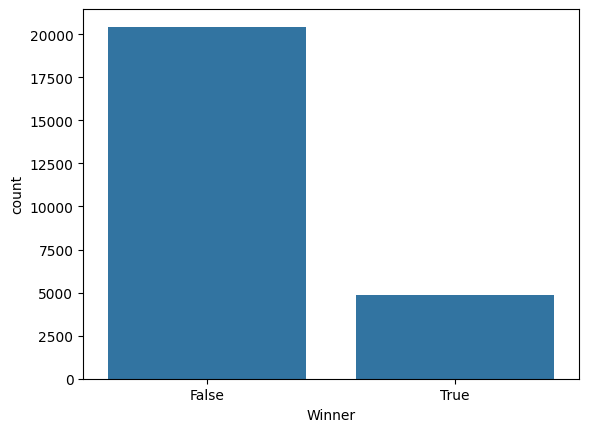

In [16]:
# How many winners vs. nominees?
df['Winner'].value_counts()
sns.countplot(data=df, x='Winner')

In [18]:
# Which artist has won the most?
winners = df[df['Winner'] == True]
winners['Nominee'].value_counts().head(10)

Nominee
(Various Artists)                          65
John Williams, composer (John Williams)    20
U2                                         18
Beyoncé                                    17
Aretha Franklin                            16
Vladimir Horowitz, artist                  15
Stevie Wonder                              14
Adele                                      13
Bruce Springsteen                          13
Ella Fitzgerald                            13
Name: count, dtype: int64

In [20]:
# Which categories has most wins?
df[df['Winner'] == True].pivot_table(index='Award Name', aggfunc='size').sort_values(ascending=False).head(10)

Award Name
Song Of The Year                  67
Record Of The Year                67
Album Of The Year                 65
Best Opera Recording              62
Best Album Notes                  60
Best Country Song                 54
Best Instrumental Composition     52
Best New Artist                   49
Best Historical Album             43
Best Chamber Music Performance    42
dtype: int64

<Axes: title={'center': 'Number of Grammy Entries Over Time'}, xlabel='Year'>

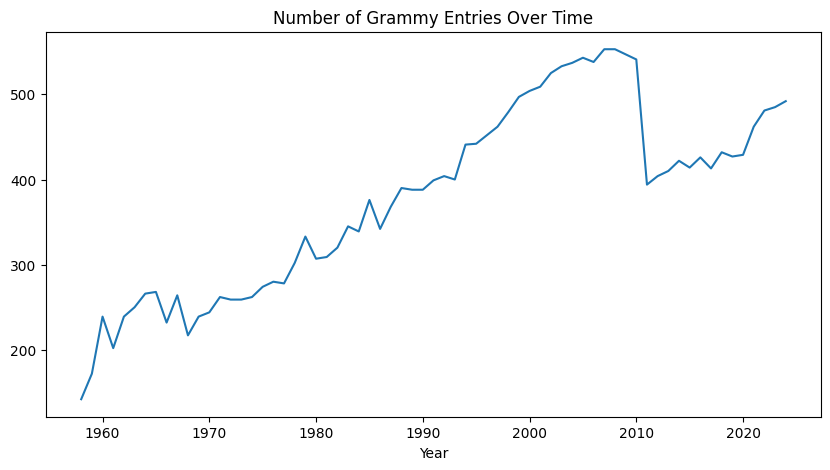

In [22]:
# How has number of Grammy award changed over the years?
df.groupby('Year').size().plot(kind='line', figsize=(10, 5), title="Number of Grammy Entries Over Time")

In [24]:
# Nominated multiple times but rarely won
# Group by Nominee and count total nominations & wins
nominee_stats = df.groupby("Nominee")["Winner"].agg(['count', 'sum'])
nominee_stats.columns = ['Total_Nominations', 'Total_Wins']

# Calculate win rate
nominee_stats['Win_Rate'] = nominee_stats['Total_Wins'] / nominee_stats['Total_Nominations']

# Filter for high nominations but low win rate
rare_winners = nominee_stats[(nominee_stats['Total_Nominations'] >= 5) & (nominee_stats['Win_Rate'] < 0.2)]
rare_winners.sort_values('Total_Nominations', ascending=False).head(10)

,Total_Nominations,Total_Wins,Win_Rate
Nominee,,,
(Chicago Symphony Orchestra),40,6,0.150000
Barbra Streisand,38,6,0.157895
Coldplay,31,6,0.193548
Dolly Parton,26,4,0.153846
Paul McCartney,23,4,0.173913
Mariah Carey,21,4,0.190476
Elton John,21,2,0.095238
(New York Philharmonic),21,2,0.095238
"Henry Mancini, composer (Henry Mancini)",19,2,0.105263


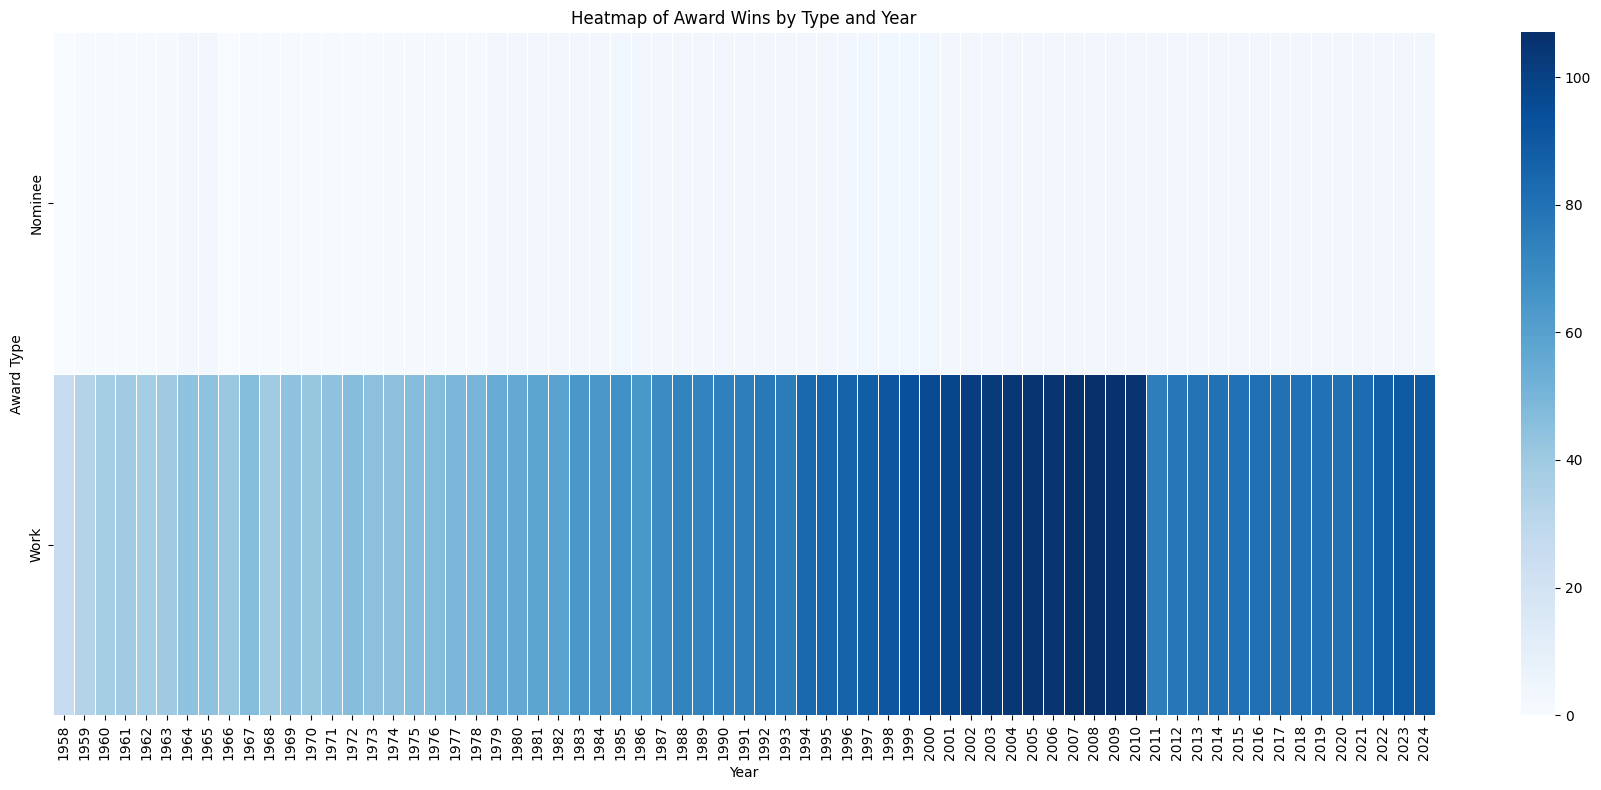

In [26]:
# Award Wins Type vs Year
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
heatmap_data = df.pivot_table(index='Award Type', columns='Year', values='Winner', aggfunc='sum', fill_value=0)

plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5)
plt.title("Heatmap of Award Wins by Type and Year")
plt.tight_layout()
plt.show()

Work
Unknown                        172
Bridge Over Troubled Water       8
Berlioz: Requiem                 7
Britten: War Requiem             6
Up, Up And Away                  6
West Side Story                  5
Mahler: Symphony No. 9 In D      5
Gentle On My Mind                5
A Taste Of Honey                 5
Not Like Us                      5
Need You Now                     5
Blackstar                        5
King Of The Road                 5
Berlioz: Les Troyens             5
This Is America                  4
Name: count, dtype: int64


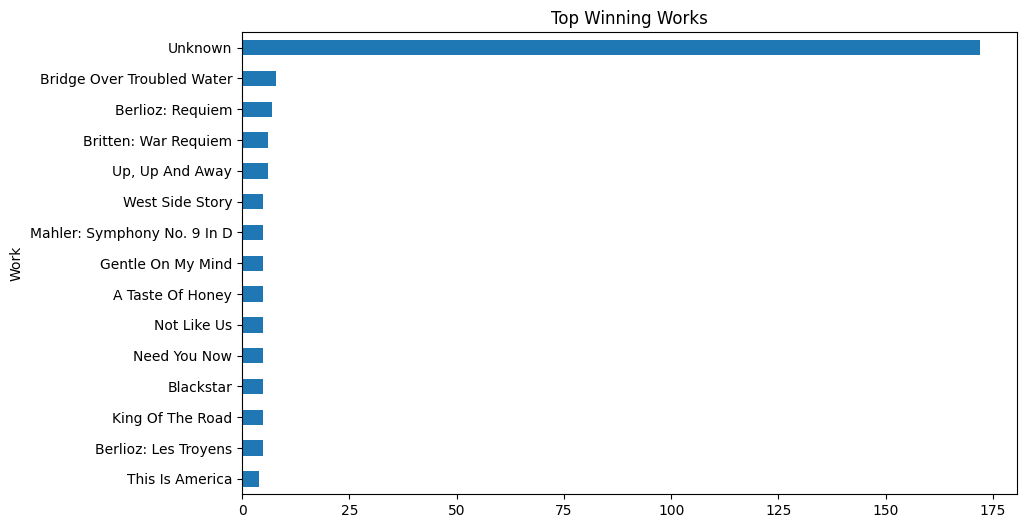

In [27]:
# Songs / Albums that won
top_works = df[df['Winner'] == 1]['Work'].value_counts().dropna().head(15)
print(top_works)

# Plot
top_works.plot(kind='barh', figsize=(10, 6), title='Top Winning Works')
plt.gca().invert_yaxis()
plt.show()